In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 CSV 檔案
df = pd.read_csv('lstm_features_with_labels.csv')


print(df.head())



   start_date  feature_0  feature_1  feature_2  feature_3  feature_4  \
0  2010-12-01   0.046828   0.037947   0.133637   0.088752  -0.067194   
1  2010-12-02   0.039739   0.039411   0.140777   0.090865  -0.062904   
2  2010-12-03   0.036157   0.038314   0.137370   0.053041  -0.021230   
3  2010-12-06   0.035932   0.026785   0.146658   0.067120  -0.032552   
4  2010-12-07   0.038847   0.024626   0.152006   0.085884  -0.039569   

   feature_5  feature_6  feature_7  feature_8  ...  feature_61  feature_62  \
0  -0.146847  -0.136251   0.016684   0.045205  ...   -0.020998    0.063128   
1  -0.144356  -0.169345   0.016609   0.045378  ...   -0.011358    0.060252   
2  -0.144381  -0.288224   0.036560   0.026998  ...    0.013899    0.044357   
3  -0.147903  -0.245161   0.024800   0.035605  ...    0.002435    0.048393   
4  -0.129084  -0.218239   0.007100   0.043485  ...   -0.001440    0.056293   

   feature_63  2317_trend  2330_trend  2454_trend  2317_trend_label  \
0    0.055446    0.051335  

findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
/tmp/ipykernel_503527/500049425.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not found.
findfont: Font family 'Noto Sans TC' not 

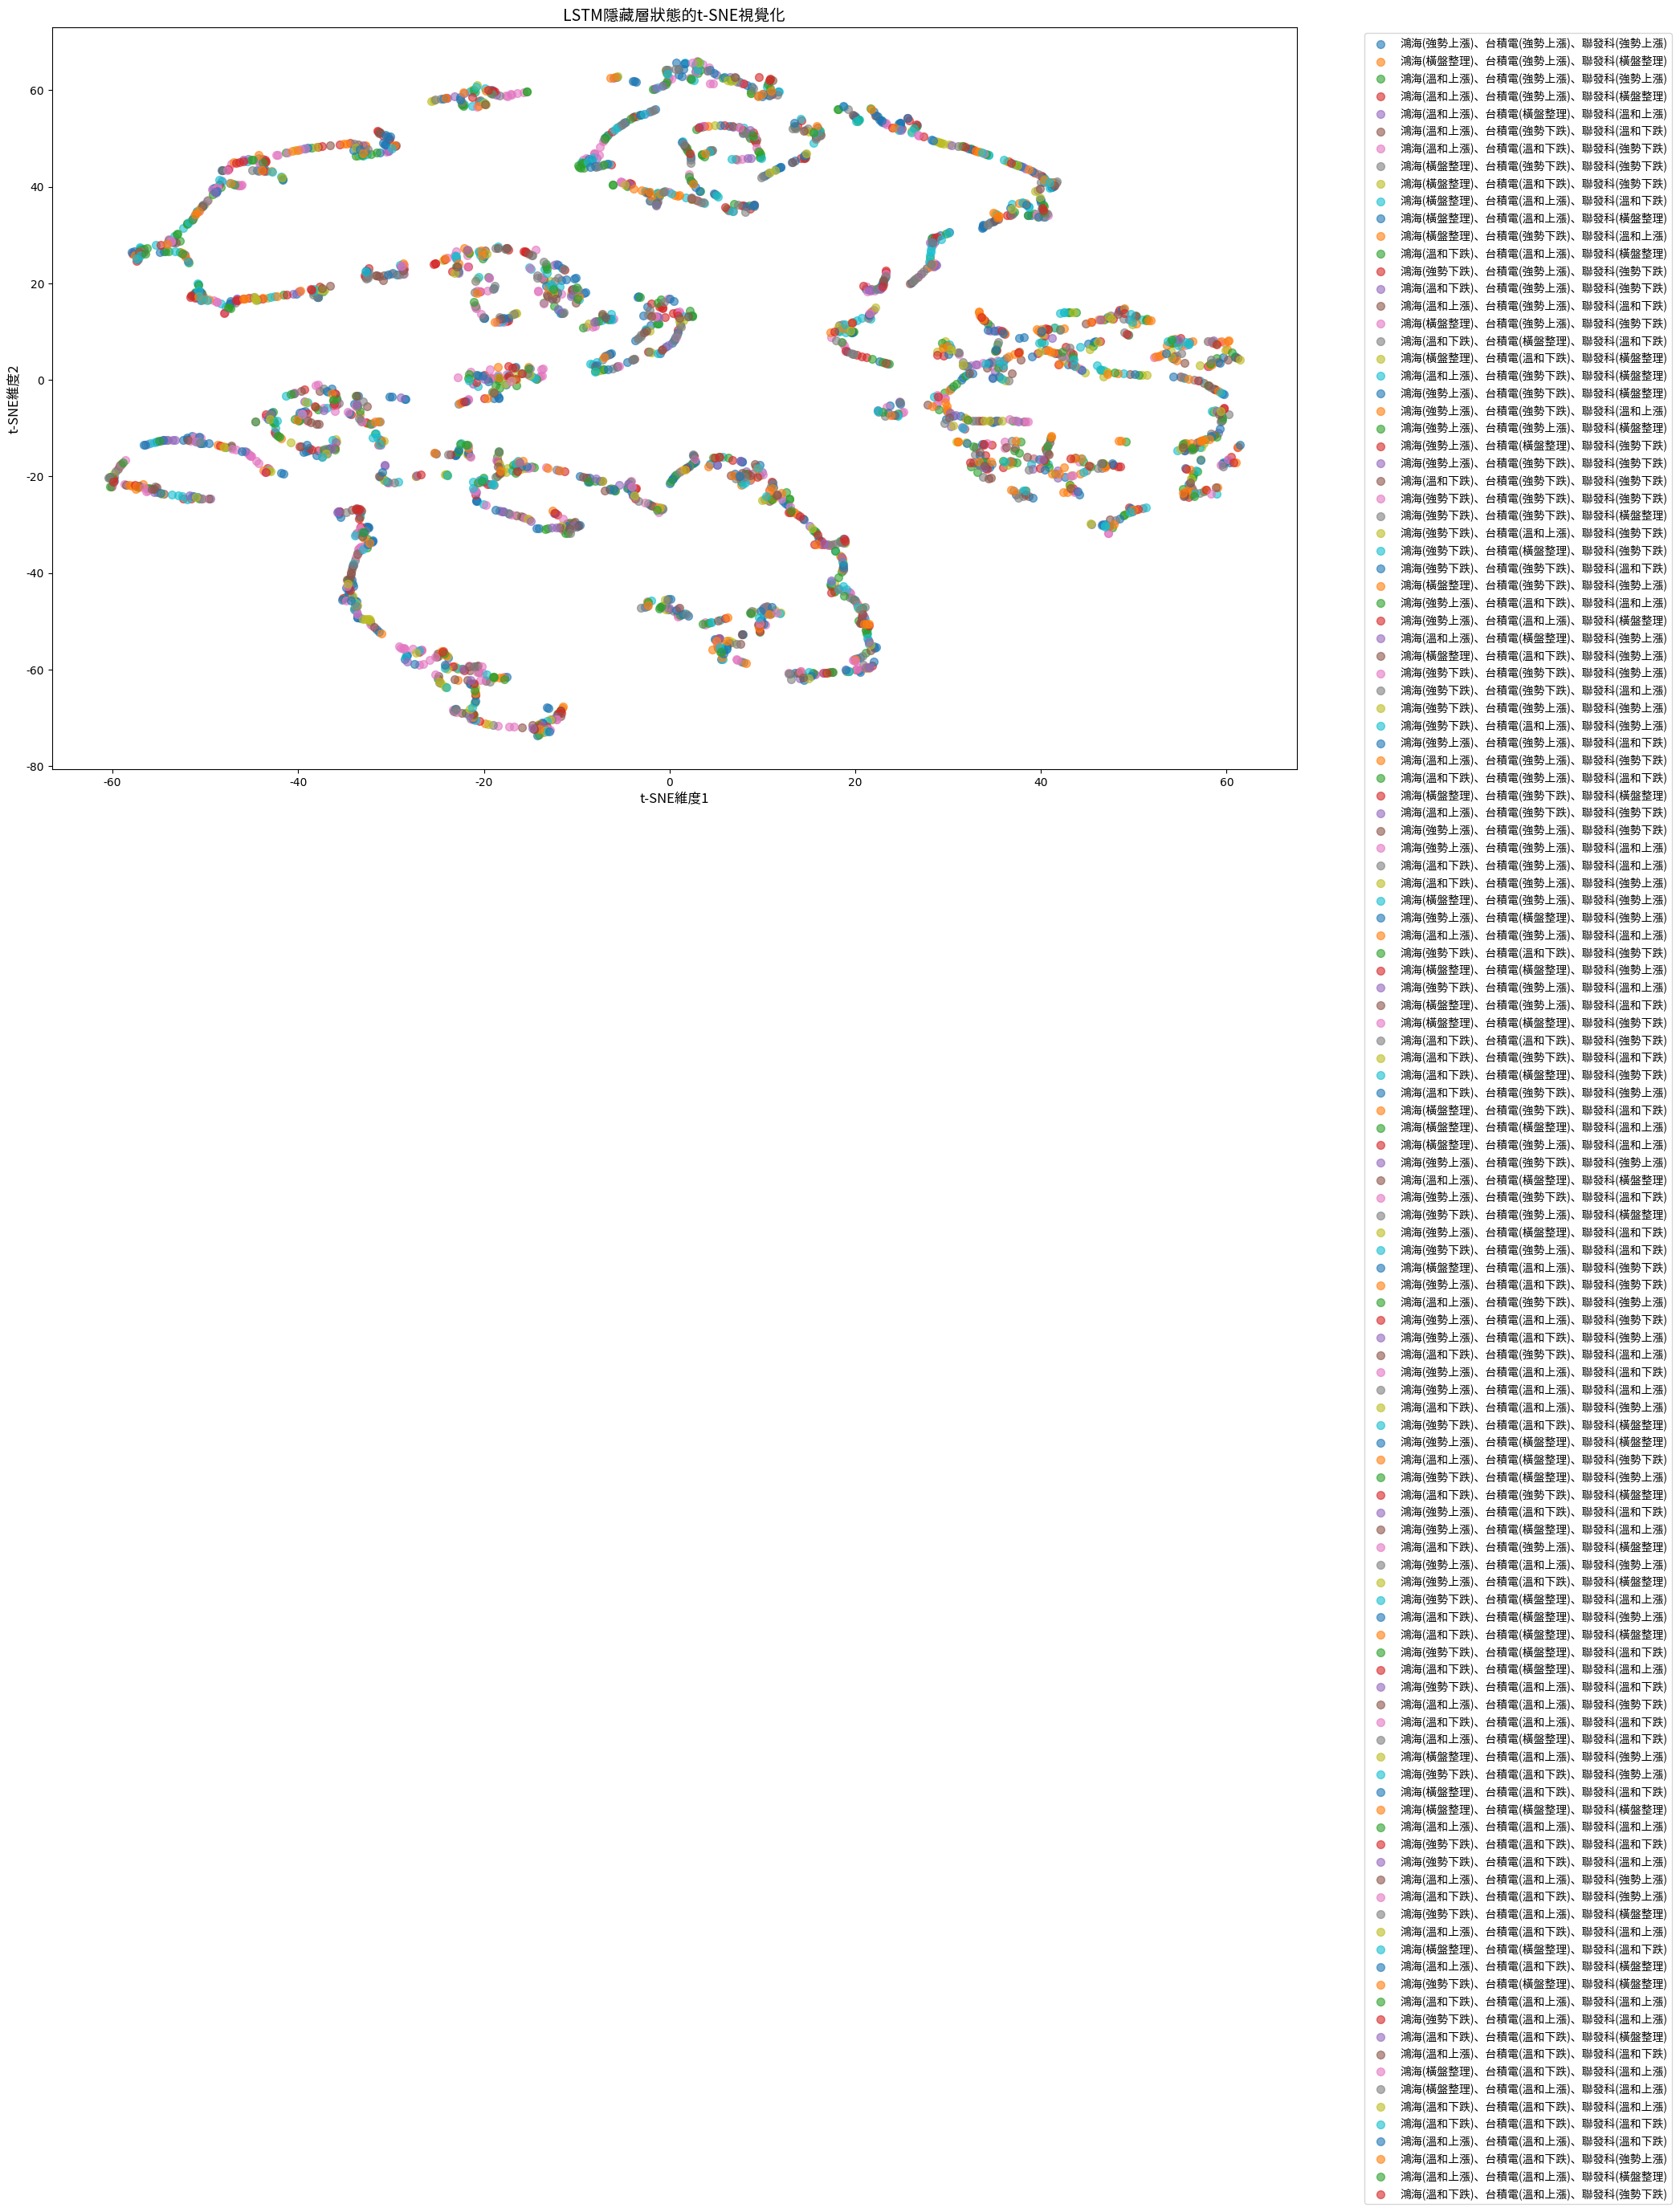


各類別數量：
trend_description
鴻海(強勢上漲)、台積電(強勢上漲)、聯發科(強勢上漲)    205
鴻海(強勢下跌)、台積電(強勢下跌)、聯發科(強勢下跌)    179
鴻海(強勢上漲)、台積電(溫和上漲)、聯發科(強勢上漲)    112
鴻海(強勢上漲)、台積電(橫盤整理)、聯發科(強勢上漲)    100
鴻海(強勢下跌)、台積電(溫和下跌)、聯發科(強勢下跌)    100
                               ... 
鴻海(溫和下跌)、台積電(溫和上漲)、聯發科(溫和下跌)      4
鴻海(溫和上漲)、台積電(溫和下跌)、聯發科(溫和上漲)      4
鴻海(溫和上漲)、台積電(強勢下跌)、聯發科(溫和下跌)      2
鴻海(橫盤整理)、台積電(強勢下跌)、聯發科(溫和上漲)      2
鴻海(溫和上漲)、台積電(強勢下跌)、聯發科(強勢上漲)      1
Name: count, Length: 124, dtype: int64


In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 設定中文字體
font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

# 提取特徵和標籤
feature_cols = [f'feature_{i}' for i in range(64)]
X = df[feature_cols].values
labels = df['trend_description']

# 使用 t-SNE 降維
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# 創建可視化圖
plt.figure(figsize=(20, 12))

# 獲取唯一的標籤
unique_labels = labels.unique()

# 為每個標籤創建不同顏色的散點
for label in unique_labels:
    mask = labels == label
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               label=label, alpha=0.6, s=50)

# 設置圖例
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          prop=font,  # 使用指定字體
          fontsize=8)

# 設置標題和軸標籤
plt.title('LSTM隱藏層狀態的t-SNE視覺化', fontproperties=font, fontsize=14)
plt.xlabel('t-SNE維度1', fontproperties=font, fontsize=12)
plt.ylabel('t-SNE維度2', fontproperties=font, fontsize=12)

# 調整布局以確保圖例完全顯示
plt.tight_layout()
plt.show()

# 打印不同類別的數量
print("\n各類別數量：")
print(labels.value_counts())